In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"D:\code_alpha_internship\data analysis\Data_visualizationTask\Coffe_sales.csv")

In [3]:
df

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.70,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.90,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.70,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000
...,...,...,...,...,...,...,...,...,...,...,...
3542,10,card,35.76,Cappuccino,Morning,Sun,Mar,7,3,2025-03-23,10:34:54.894000
3543,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:43:37.362000
3544,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:44:16.864000
3545,15,card,25.96,Americano,Afternoon,Sun,Mar,7,3,2025-03-23,15:47:28.723000


In [4]:
df.info

<bound method DataFrame.info of       hour_of_day cash_type  money    coffee_name Time_of_Day Weekday  \
0              10      card  38.70          Latte     Morning     Fri   
1              12      card  38.70  Hot Chocolate   Afternoon     Fri   
2              12      card  38.70  Hot Chocolate   Afternoon     Fri   
3              13      card  28.90      Americano   Afternoon     Fri   
4              13      card  38.70          Latte   Afternoon     Fri   
...           ...       ...    ...            ...         ...     ...   
3542           10      card  35.76     Cappuccino     Morning     Sun   
3543           14      card  35.76          Cocoa   Afternoon     Sun   
3544           14      card  35.76          Cocoa   Afternoon     Sun   
3545           15      card  25.96      Americano   Afternoon     Sun   
3546           18      card  35.76          Latte       Night     Sun   

     Month_name  Weekdaysort  Monthsort        Date             Time  
0           Mar     

In [12]:
df.isna().sum()

hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64

In [15]:
df.duplicated().any()

False

In [16]:
df.head(5)

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


C:\Users\Dell\AppData\Local\Temp\ipykernel_4672\1601054608.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_revenue.index, y=product_revenue.values, palette='viridis')


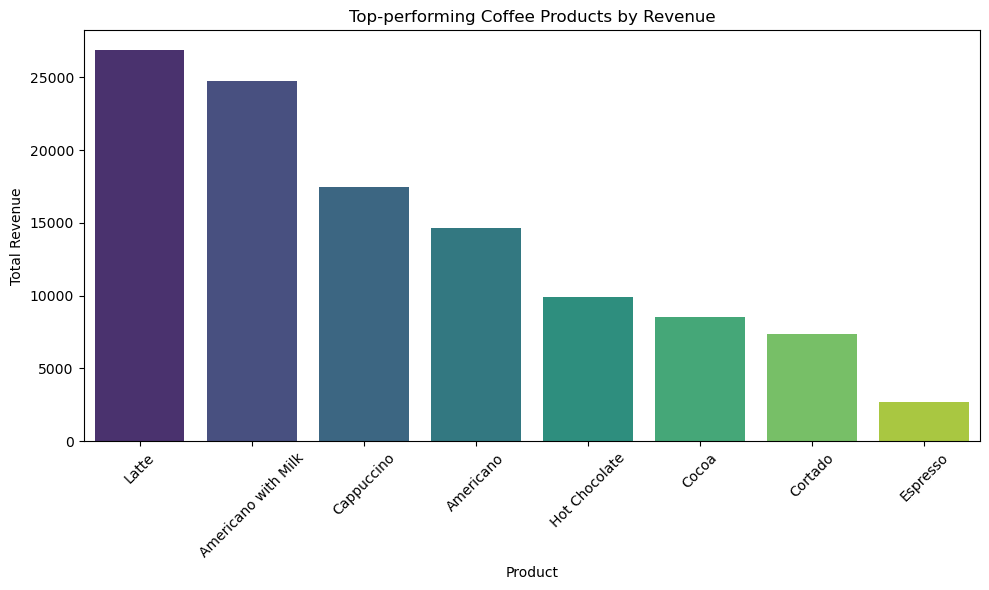

In [17]:

product_revenue = df.groupby('coffee_name')['money'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=product_revenue.index, y=product_revenue.values, palette='viridis')
plt.title('Top-performing Coffee Products by Revenue')
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



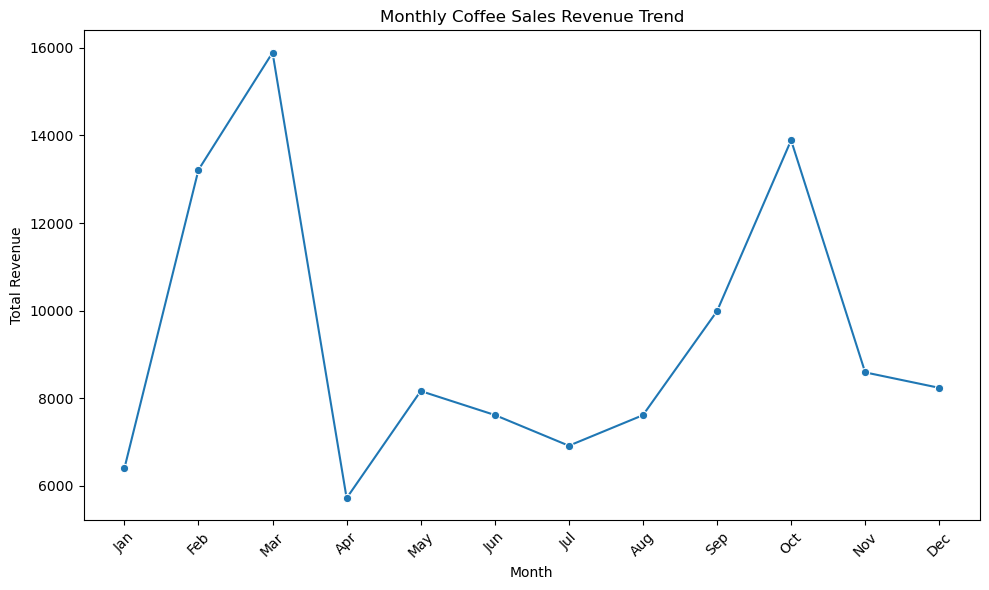

In [18]:
monthly_revenue = df.groupby('Month_name')['money'].sum()
# ترتيب الشهور لو مطلوب
months_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
monthly_revenue = monthly_revenue.reindex(months_order)

plt.figure(figsize=(10,6))
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values, marker='o')
plt.title('Monthly Coffee Sales Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


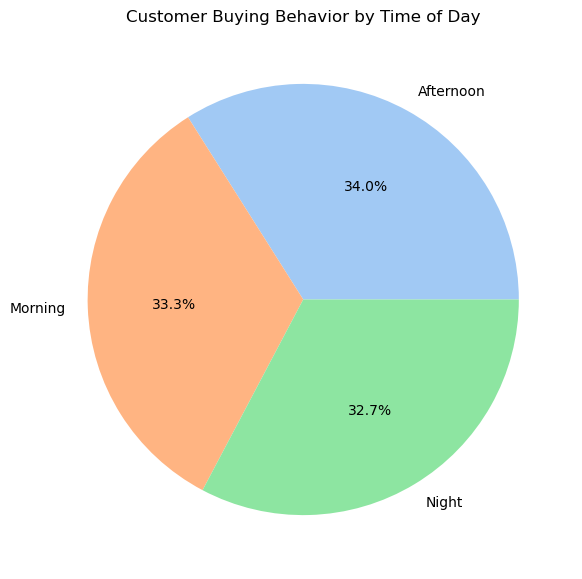

In [19]:
time_sales = df['Time_of_Day'].value_counts(normalize=True) * 100

plt.figure(figsize=(7,7))
plt.pie(time_sales, labels=time_sales.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Customer Buying Behavior by Time of Day')
plt.show()


<Figure size 1000x600 with 0 Axes>

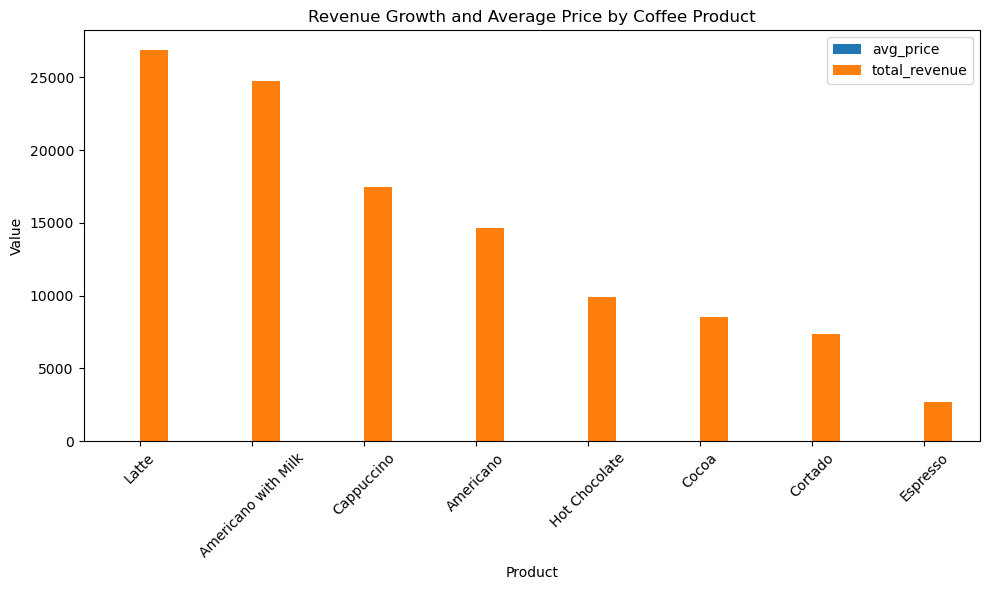

In [20]:
# متوسط السعر لكل منتج و إجمالي الإيراد
avg_price = df.groupby('coffee_name')['money'].mean()
total_revenue = df.groupby('coffee_name')['money'].sum()

comparison_df = pd.DataFrame({
    'avg_price': avg_price,
    'total_revenue': total_revenue
}).sort_values('total_revenue', ascending=False).head(8) # أهم المنتجات

plt.figure(figsize=(10,6))
comparison_df[['avg_price', 'total_revenue']].plot(kind='bar', figsize=(10,6))
plt.title('Revenue Growth and Average Price by Coffee Product')
plt.xlabel('Product')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
